In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
os.environ["OMP_NUM_THREADS"] = "4"
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats


In [205]:
# read preprocessed data
data = pd.read_csv("data/preprocessedData.csv")
data = data.drop('Unnamed: 0', axis=1)  
data = data.iloc[:1000]
# separate the predictors and the criterion variable
trainCrit = data['Heart_Disease']  
#data = data.drop('Heart_Disease', axis=1)  


In [118]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,4,0,0,0,0,0,0,1,1,82,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,5,0,1,0,0,0,1,0,1,82,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,5,1,0,0,0,0,1,0,1,82,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,5,1,1,0,0,0,1,0,0,77,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,5,0,0,0,0,0,0,0,0,82,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,1,0,0,0,0,0,0,1,82,175.0,81.65,26.58,1,0.0,30.0,5.0,0.0
996,4,5,0,0,0,0,1,0,0,0,82,175.0,97.52,31.75,0,0.0,30.0,30.0,12.0
997,3,3,1,0,0,0,0,0,0,0,82,191.0,104.33,28.75,1,12.0,20.0,16.0,2.0
998,4,5,1,0,0,0,0,0,0,0,82,193.0,81.65,21.91,0,7.0,30.0,0.0,20.0


## PCA

[0.61051515 0.21473112 0.43321554 0.26050953 0.09216937 0.14398794
 0.32678993 0.4495801  0.52023104 0.76449537 0.07813244 0.78987209
 0.69723068 0.56049668 0.18001283 0.35142492 0.0739811  0.22307191
 0.13518506]
                         Feature  Importance
11                   Height_(cm)    0.114381
9                            Sex    0.110706
12                   Weight_(kg)    0.100966
0                 General_Health    0.088408
13                           BMI    0.081165
8                      Arthritis    0.075334
7                       Diabetes    0.065103
2                       Exercise    0.062734
15           Alcohol_Consumption    0.050890
6                     Depression    0.047322
3                  Heart_Disease    0.037724
17  Green_Vegetables_Consumption    0.032303
1                        Checkup    0.031095
14               Smoking_History    0.026068
5                   Other_Cancer    0.020851
18       FriedPotato_Consumption    0.019576
4                    

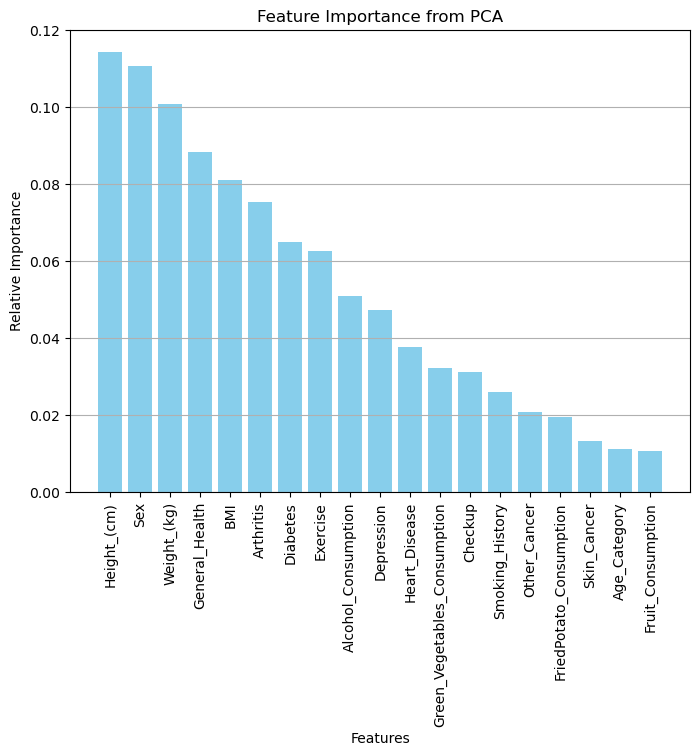

In [207]:
# scale data, so that all variables contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA, get 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components.sum(axis=0))

# Compute total importance of each feature
feature_importance = components.sum(axis=0)
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

[[0.2905702  0.07555989 0.12307989 0.21906767 0.04933096 0.03486336
  0.13399231 0.25907675 0.21188651 0.28865402 0.00682326 0.30761587
  0.54955849 0.44804285 0.10017584 0.09557916 0.05753159 0.07501995
  0.06511641]
 [0.32005695 0.13819999 0.30454341 0.03501966 0.04169223 0.11167847
  0.19970109 0.19765355 0.31139603 0.475125   0.07030172 0.48244662
  0.14872791 0.1105617  0.07780959 0.25229903 0.01530643 0.14814044
  0.06850003]]
                         Feature  Importance
12                   Weight_(kg)    0.162038
13                           BMI    0.132106
11                   Height_(cm)    0.090701
0                 General_Health    0.085675
9                            Sex    0.085110
7                       Diabetes    0.076389
3                  Heart_Disease    0.064592
8                      Arthritis    0.062475
6                     Depression    0.039508
2                       Exercise    0.036290
14               Smoking_History    0.029537
15           Alcohol_Co

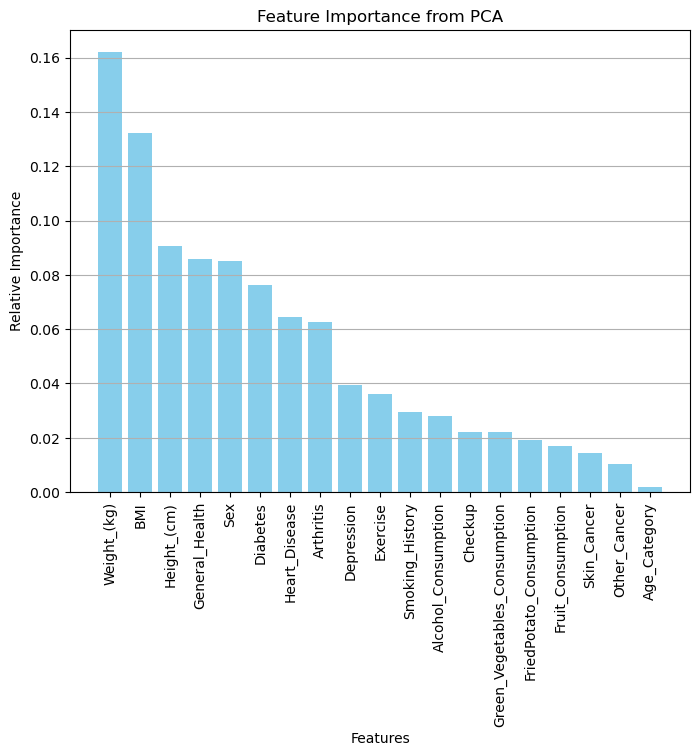

In [208]:
# scale data, so that all variables contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA, get 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components)

# Compute total importance of each feature
feature_importance = components[0]
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

[[0.28996553 0.07690262 0.12404726 0.21962592 0.04915932 0.03531825
  0.13288728 0.25825049 0.21124967 0.28824144 0.00671302 0.30726413
  0.54983582 0.44857084 0.10055293 0.09669429 0.0584024  0.07422533
  0.06545489]
 [0.32042004 0.13504401 0.30567844 0.03761348 0.04654355 0.10937278
  0.19549661 0.19394598 0.3097512  0.47548397 0.07430833 0.48141049
  0.14778185 0.11100825 0.07713391 0.25902493 0.0158383  0.14841219
  0.07406662]]
                         Feature  Importance
11                   Height_(cm)    0.136829
9                            Sex    0.135145
0                 General_Health    0.091072
8                      Arthritis    0.088039
2                       Exercise    0.086882
15           Alcohol_Consumption    0.073621
6                     Depression    0.055565
7                       Diabetes    0.055124
17  Green_Vegetables_Consumption    0.042183
12                   Weight_(kg)    0.042003
1                        Checkup    0.038383
13                     

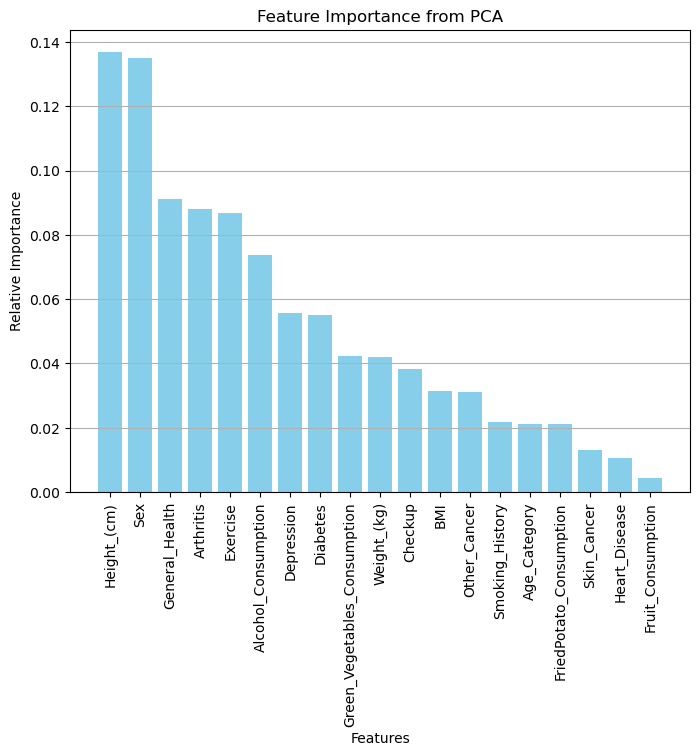

In [209]:
# scale data, so that all variables contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA, get 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components)

# Compute total importance of each feature
feature_importance = components[1]
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## 1. K-means algorithm

### Find out the best k for k-means using the "elbow method"

In [120]:
data_kmeans = data.copy()
data_kmeans = data_kmeans.apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the data
data_kmeans

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.00,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.211268,0.000000,0.012715,1.0,0.000000,0.250000,0.133333,0.100000
1,0.75,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.422535,0.328845,0.376954,0.0,0.000000,0.250000,0.000000,0.033333
2,0.75,1.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.394366,0.412740,0.514172,0.0,0.133333,0.100000,0.025000,0.133333
3,0.00,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.633803,0.449656,0.388609,0.0,0.000000,0.250000,0.250000,0.066667
4,0.50,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.788732,0.412740,0.273113,1.0,0.000000,0.066667,0.033333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.00,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.563380,0.362432,0.331656,1.0,0.000000,0.250000,0.041667,0.000000
996,0.75,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.563380,0.479840,0.468609,0.0,0.000000,0.250000,0.250000,0.100000
997,0.50,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.788732,0.530221,0.389139,1.0,0.400000,0.166667,0.133333,0.016667
998,0.75,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.816901,0.362432,0.207947,0.0,0.233333,0.250000,0.000000,0.166667


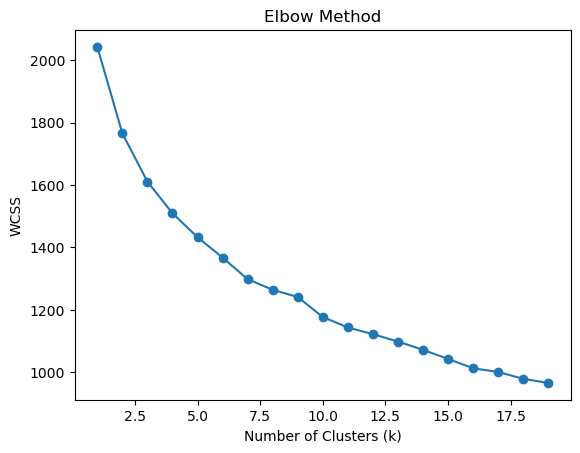

In [121]:
wcss = [] # wcss = Within-Cluster Sum of Squares, measures total variance within each cluster, which we aim to minimize
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # 10 rounds repeat (since performance dependend on random first centers)
    kmeans.fit(data_kmeans)
    wcss.append(kmeans.inertia_) # inertia is wcss for specific k
    
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [122]:
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

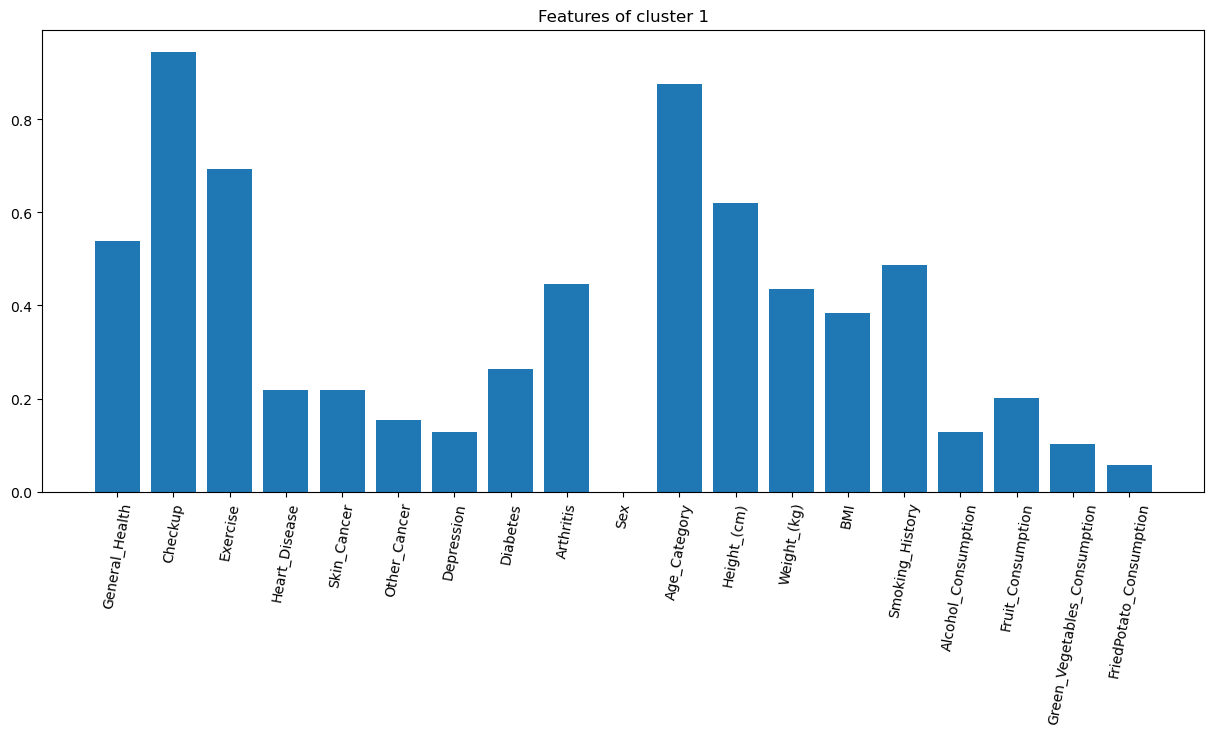

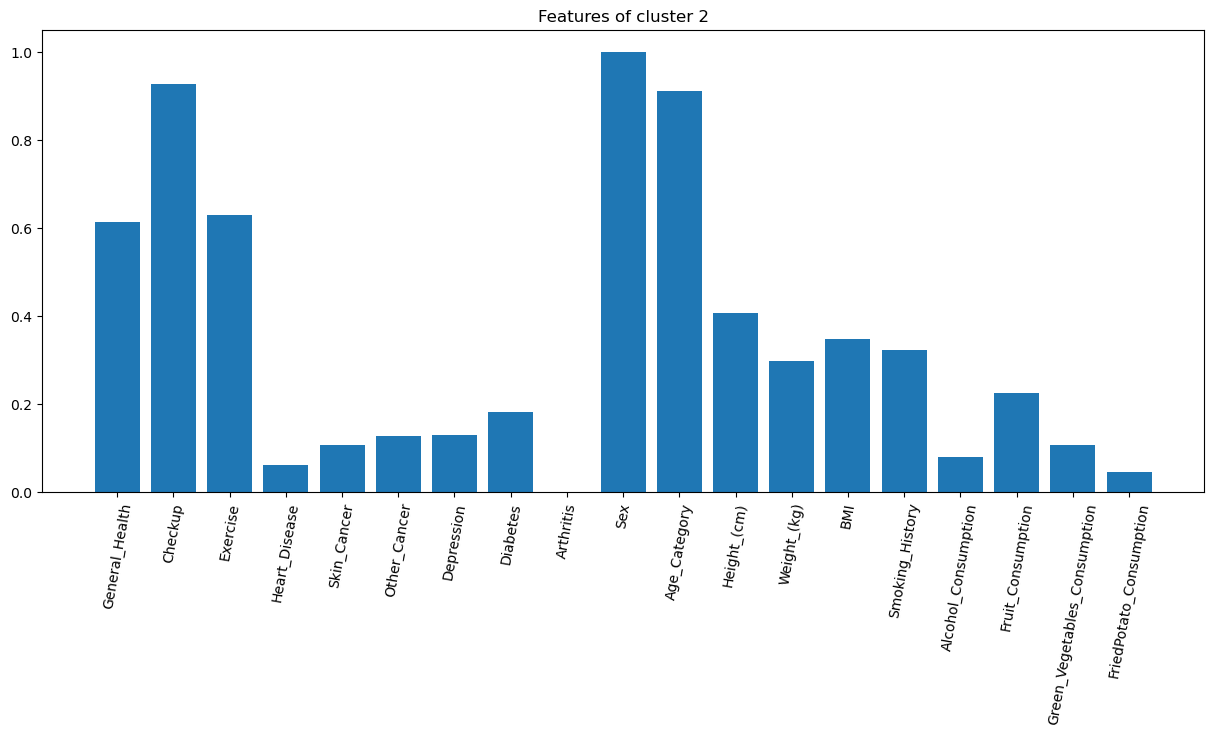

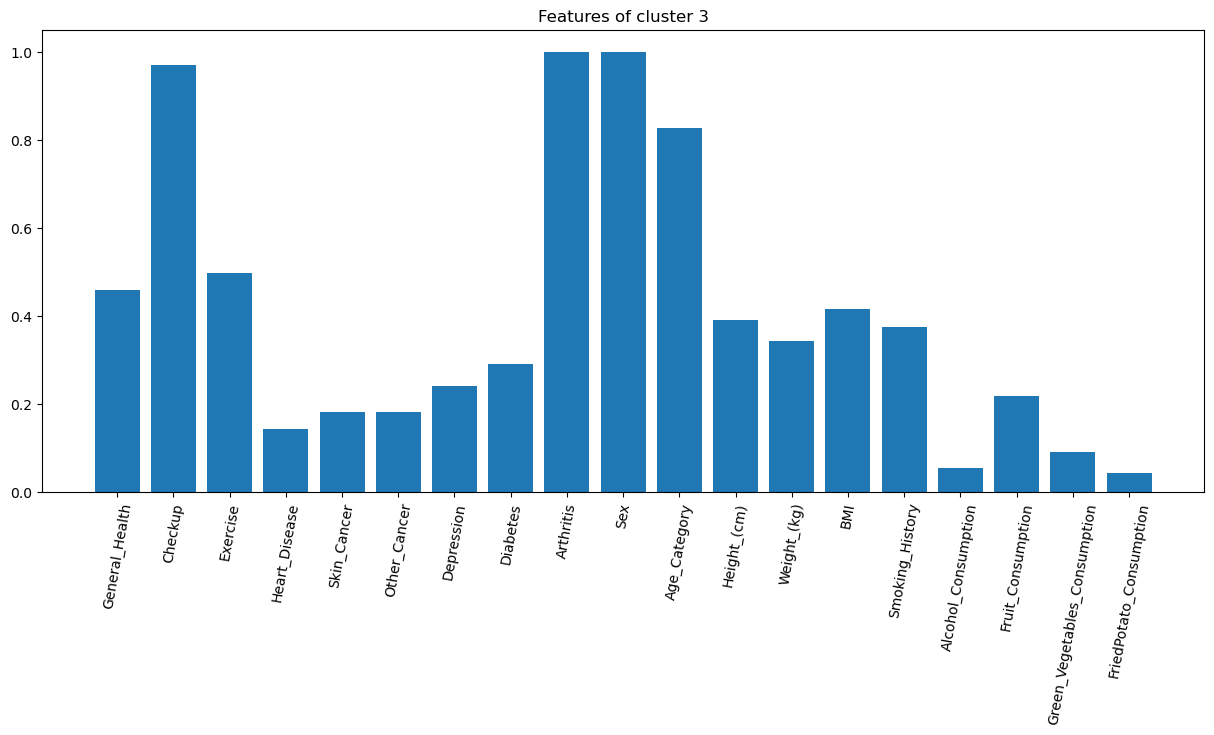

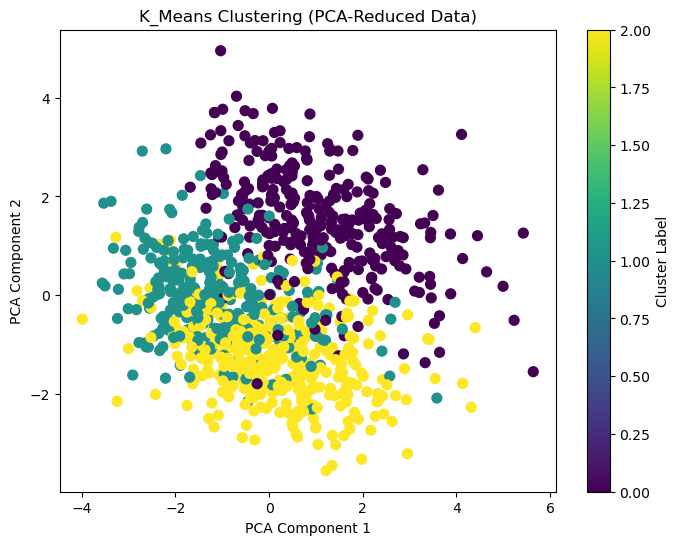

In [123]:
clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

for i in range(0, len(clusters)):
    plt.figure(figsize=(15, 6))
    plt.bar(clusters[i].index, clusters[i])
    plt.title(f"Features of cluster {i+1}")
    plt.xticks(rotation=80)  # Rotate the labels 45 degrees
    plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
labels = data_kmeans['Cluster assignment']

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("K_Means Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Sex                             1.000000
Arthritis                       0.103906
Depression                      0.062202
Fruit_Consumption               0.020317
Checkup                         0.005432
Other_Cancer                    0.001677
BMI                             0.001254
Green_Vegetables_Consumption   -0.005304
General_Health                 -0.010556
Age_Category                   -0.011628
FriedPotato_Consumption        -0.014651
Diabetes                       -0.021541
Alcohol_Consumption            -0.062671
Skin_Cancer                    -0.071146
Heart_Disease                  -0.111844
Weight_(kg)                    -0.114476
Exercise                       -0.135622
Smoking_History                -0.136889
Height_(cm)                    -0.223837
dtype: float64
6.5


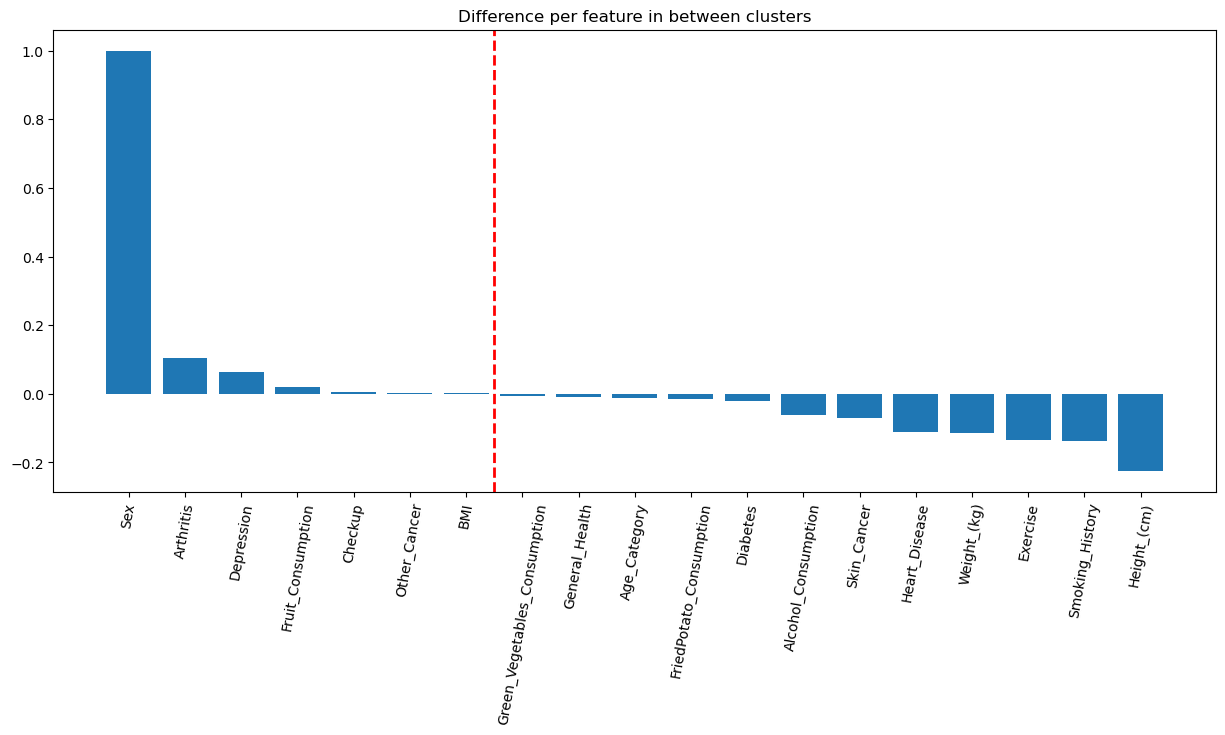

In [124]:
# only possible if k=2
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=2, random_state=13, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

# get difference
s1, s2 = clusters    
difference = s2 -s1

difference = difference.sort_values(ascending=False)
print(difference)

x_position = list(difference.index).index("Green_Vegetables_Consumption")-0.5
print(x_position)
plt.figure(figsize=(15, 6))
plt.bar(difference.index, difference)
plt.axvline(x=x_position, color='red', linestyle='--', linewidth=2)
plt.title(f"Difference per feature in between clusters")
plt.xticks(rotation=80)  # Rotate the labels 45 degrees
plt.show()

In [127]:
# see correlations between clusters and heart disease
pd.crosstab(data_kmeans['Cluster assignment'], trainCrit)
#print(clusters, data_kmeans['Cluster assignment'])

Heart_Disease,0,1
Cluster assignment,,
0,244,68
1,615,73


In [128]:
scipy.stats.spearmanr(data_kmeans['Cluster assignment'], trainCrit).correlation   # Spearman's rho

-0.14889438767163948

In [200]:
dataKMeans = data.copy()
dataKMeans["KMeans_Cluster"] = data_kmeans['Cluster assignment']
summariesGrouped = dataKMeans.groupby("KMeans_Cluster").agg(["mean"])
summariesGrouped

,Heart_Disease,Alcohol_Consumption,Other_Cancer,Skin_Cancer,Depression,Diabetes,Smoking_History,Arthritis,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health,Checkup,Exercise,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,DBSCAN_Cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,
0,0.217949,3.836538,0.153846,0.217949,0.128205,0.262821,0.487179,0.445513,24.025641,12.310897,6.868590,3.157051,4.782051,0.692308,0.0,81.37500,179.108974,91.641442,28.526667,-0.644231
1,0.106105,1.956395,0.155523,0.146802,0.190407,0.241279,0.350291,0.549419,26.463663,11.674419,5.110465,3.114826,4.803779,0.556686,1.0,81.31686,163.216570,76.167718,28.573997,-0.422965


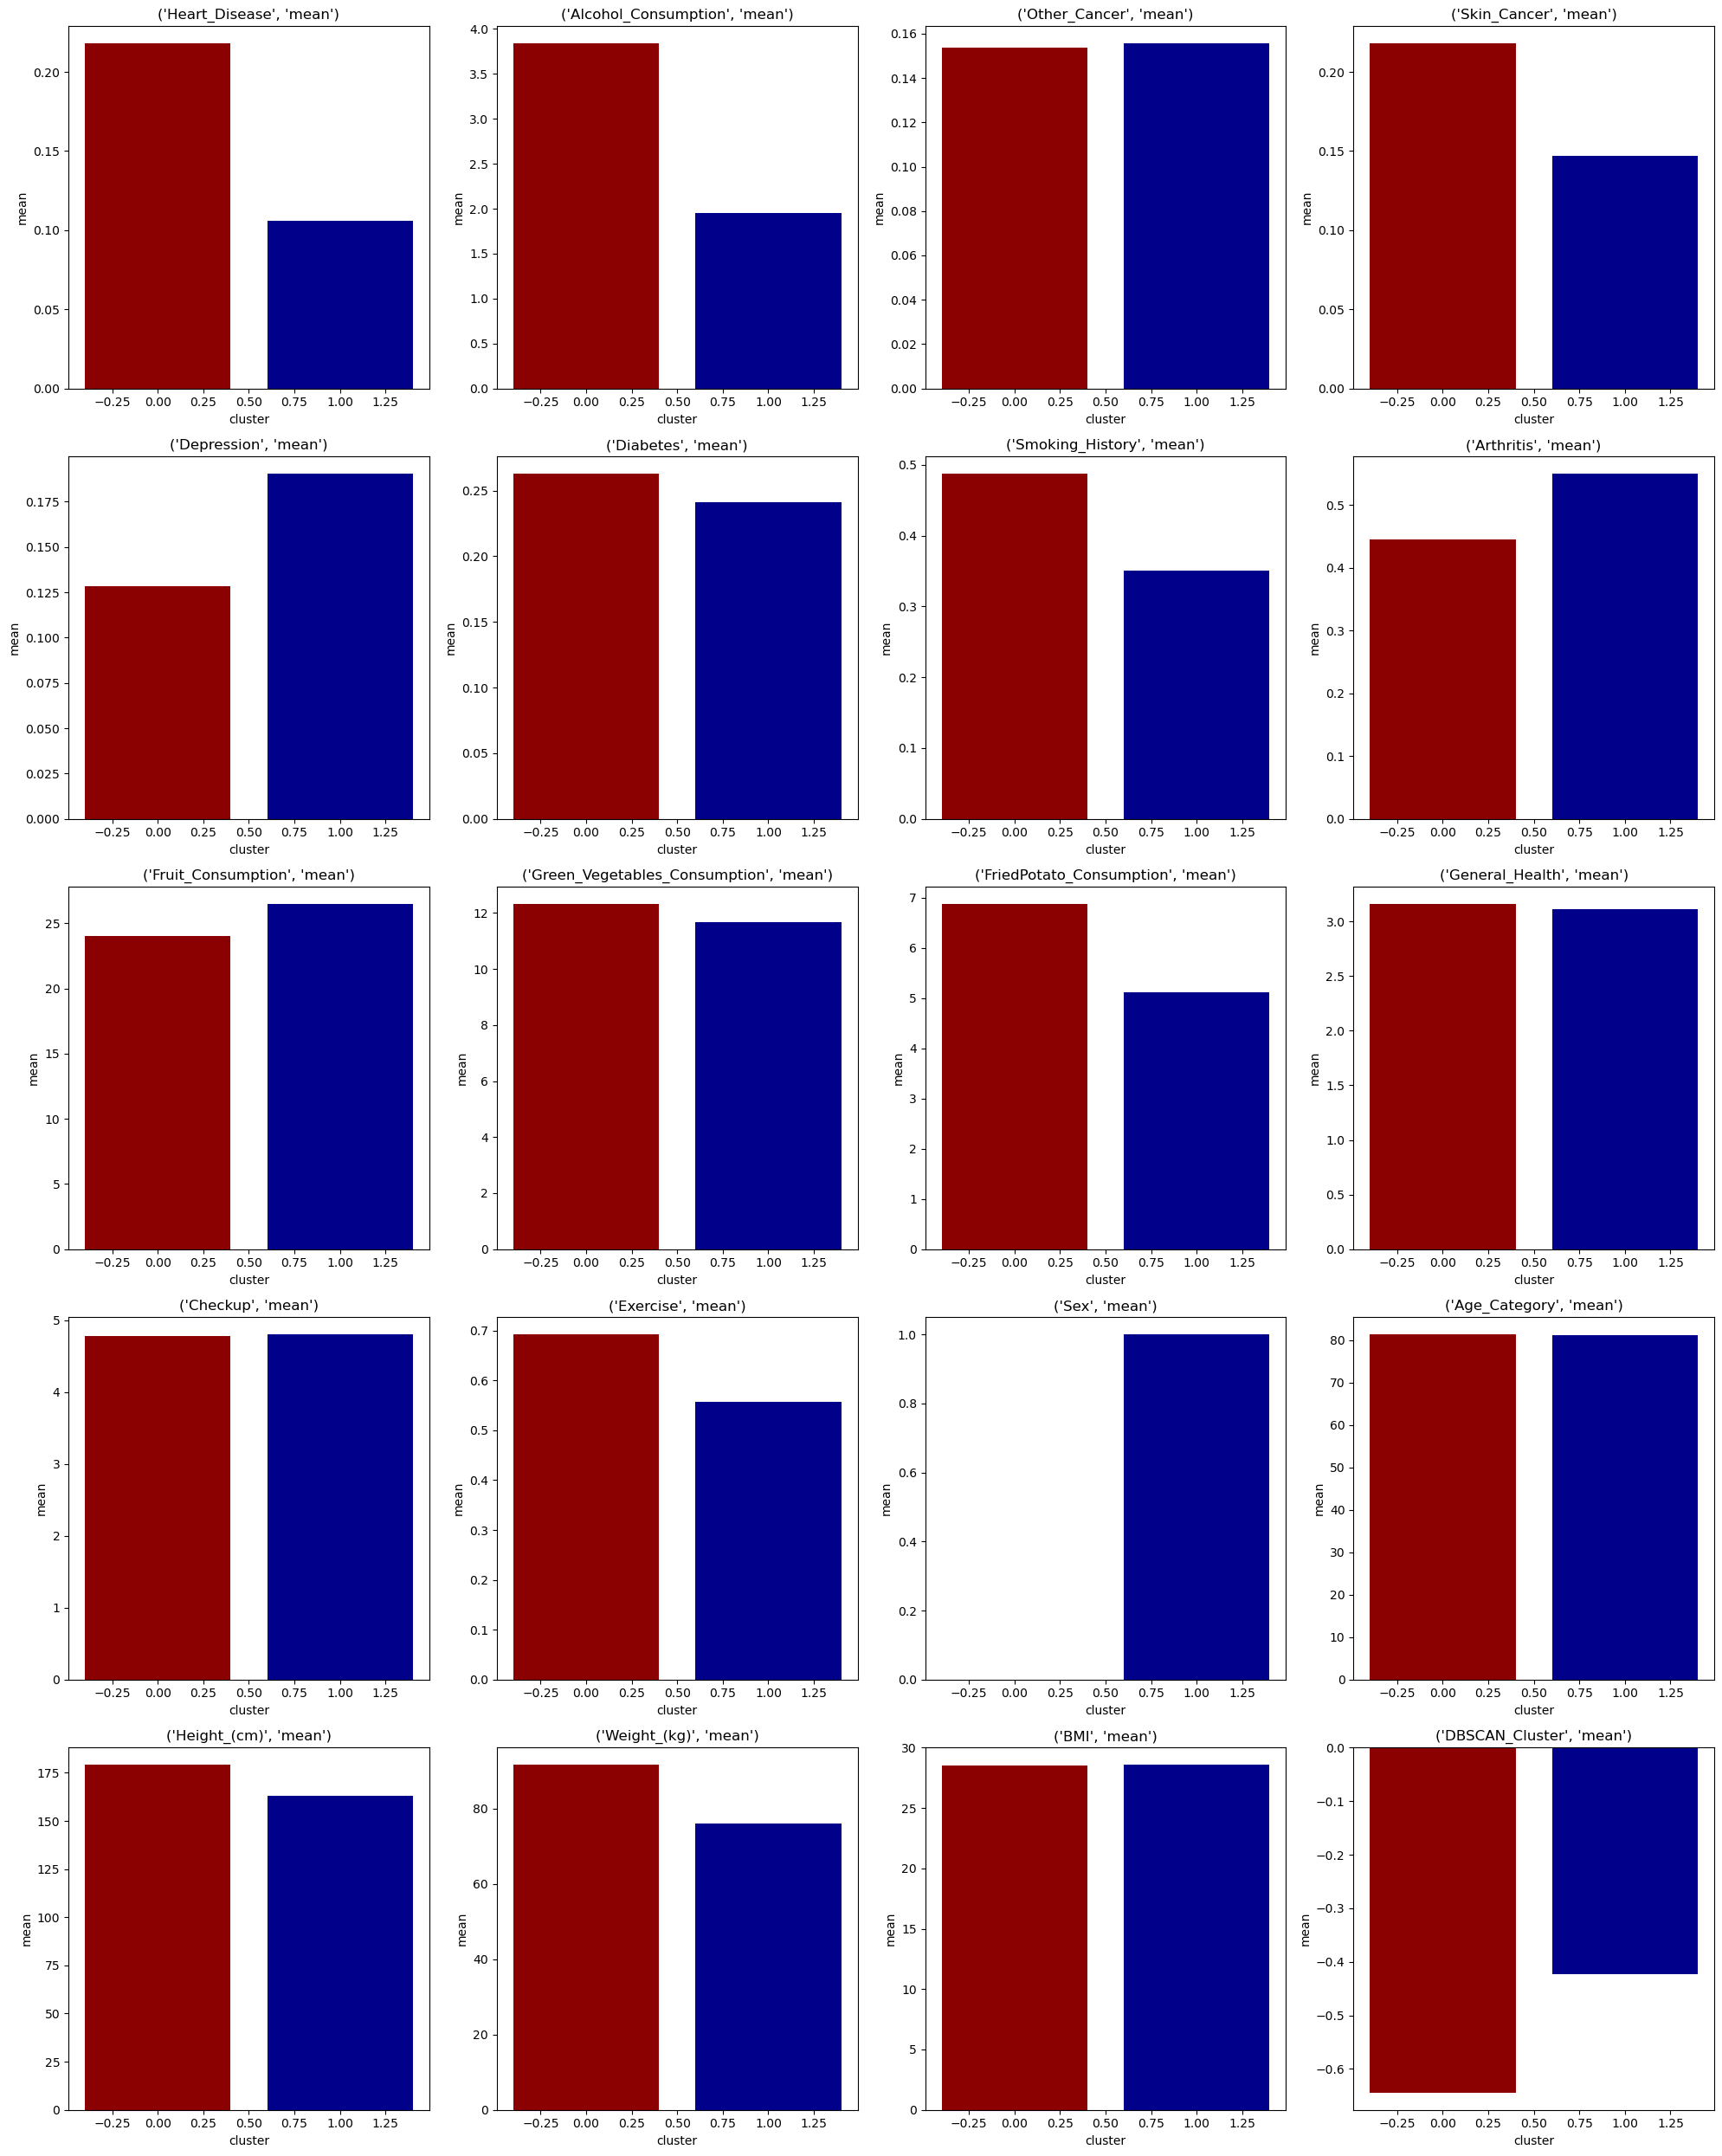

In [201]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  
axes = axes.flatten()
for i, col in enumerate(summariesGrouped.columns):
    axes[i].bar(summariesGrouped.index[0], summariesGrouped[col].iloc[0], color='darkred')  # First bar
    axes[i].bar(summariesGrouped.index[1], summariesGrouped[col].iloc[1], color='darkblue')
    #axes[i].bar(summariesGrouped.index, summariesGrouped[col])  # Bar plot for each feature
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('cluster')
    axes[i].set_ylabel('mean')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [129]:
# ???
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
X_pca.shape

(1000, 2)

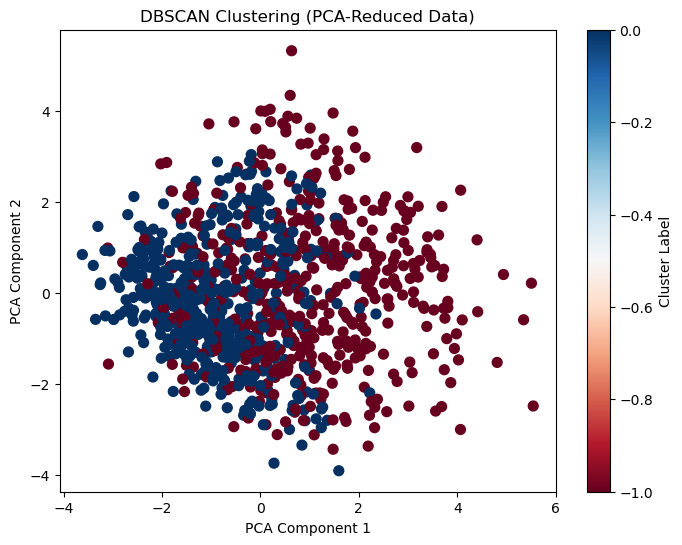

In [174]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
#X, _ = make_blobs(n_samples=200, n_features=19, centers=3, random_state=42)

dbscan = DBSCAN(eps=3, min_samples=15)
labels = dbscan.fit_predict(X)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='RdBu', s=50)
plt.colorbar(label='Cluster Label')
plt.title("DBSCAN Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [193]:
columnsNewOrder = ['Heart_Disease', 'Alcohol_Consumption', 'Other_Cancer', 'Skin_Cancer','Depression', 'Diabetes',
                   'Smoking_History',  'Arthritis', 'Fruit_Consumption',
                    'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
                    'Sex', 'General_Health', 'Exercise', 'Checkup',   
                    'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', ]

In [194]:
dataOrder = data[columnsNewOrder]
dataOrder["DBSCAN_Cluster"] = labels
summariesGrouped = dataOrder.groupby("DBSCAN_Cluster").agg(["mean"])
summariesGrouped

,Heart_Disease,Alcohol_Consumption,Other_Cancer,Skin_Cancer,Depression,Diabetes,Smoking_History,Arthritis,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex,General_Health,Exercise,Checkup,Age_Category,Height_(cm),Weight_(kg),BMI
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,
-1,0.286585,4.028455,0.247967,0.250000,0.223577,0.298780,0.467480,0.577236,28.542683,13.613821,6.930894,0.591463,2.945122,0.565041,4.695122,80.648374,169.611789,83.259756,28.852541
0,0.000000,1.104331,0.064961,0.090551,0.120079,0.198819,0.320866,0.458661,22.952756,10.187008,4.427165,0.781496,3.305118,0.631890,4.895669,82.000000,166.783465,78.802598,28.275157


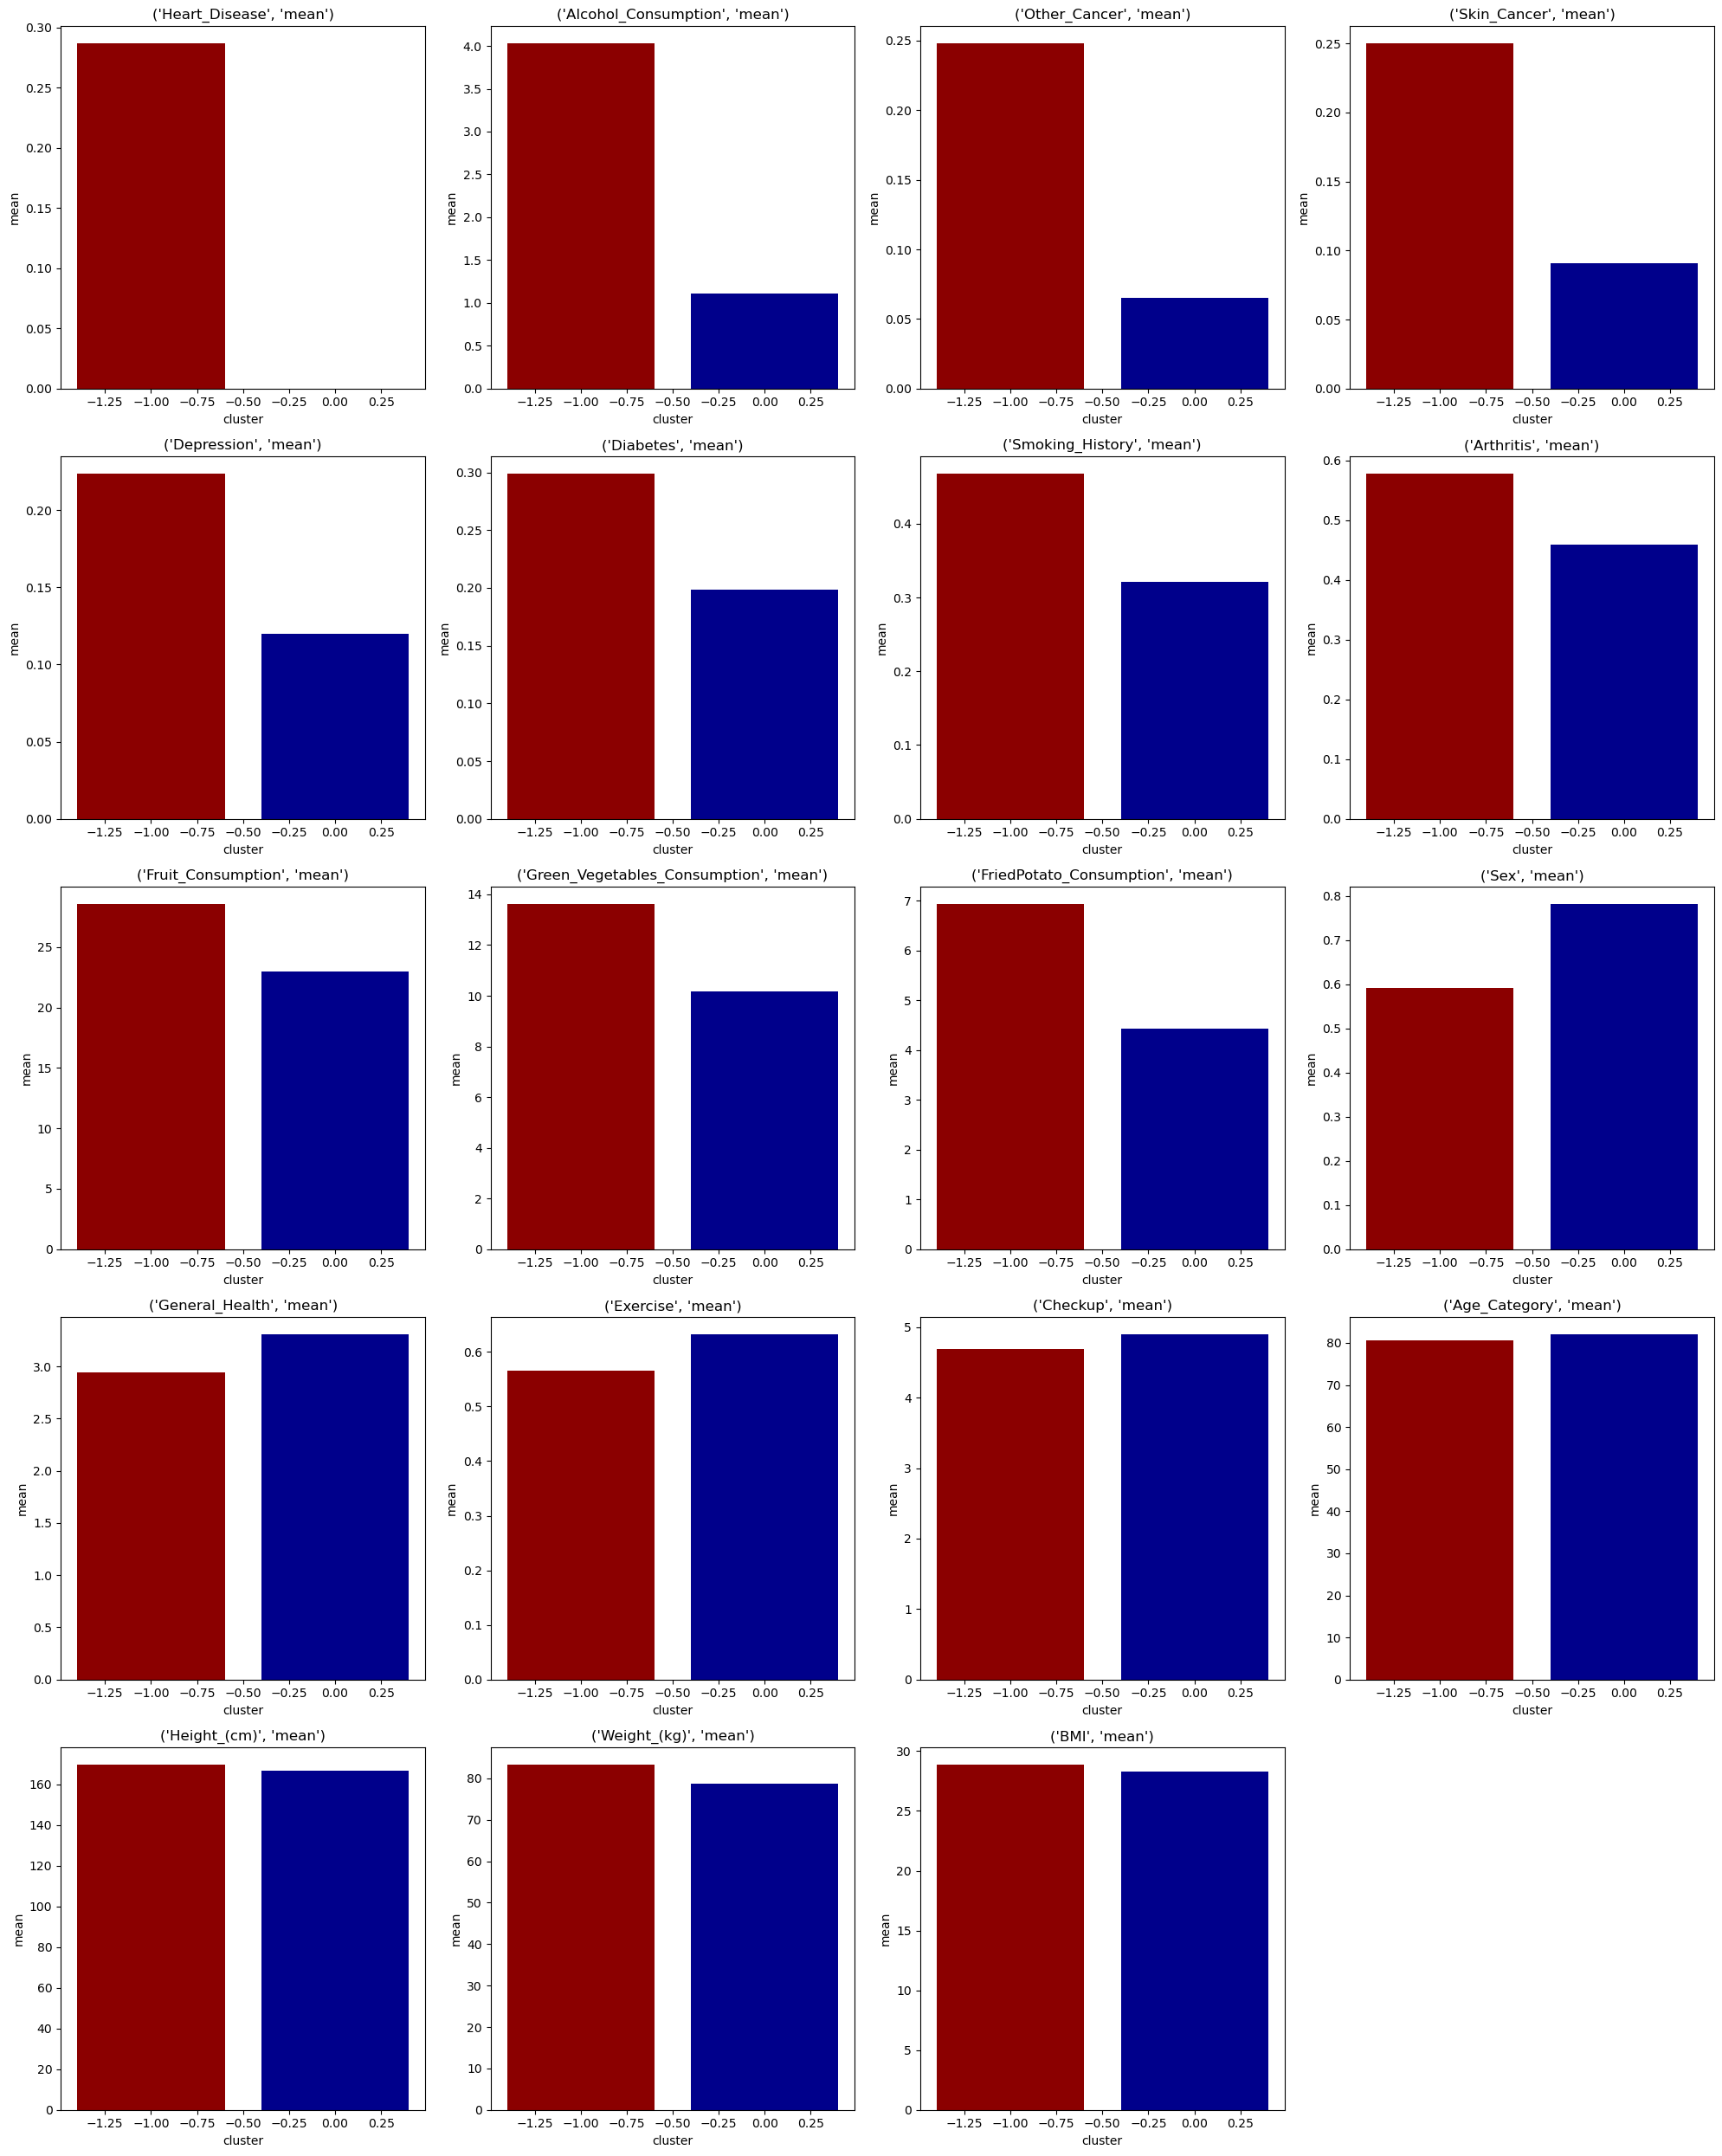

In [195]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  
axes = axes.flatten()
for i, col in enumerate(summariesGrouped.columns):
    axes[i].bar(summariesGrouped.index[0], summariesGrouped[col].iloc[0], color='darkred')  # First bar
    axes[i].bar(summariesGrouped.index[1], summariesGrouped[col].iloc[1], color='darkblue')
    #axes[i].bar(summariesGrouped.index, summariesGrouped[col])  # Bar plot for each feature
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('cluster')
    axes[i].set_ylabel('mean')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [198]:
pd.crosstab(labels, trainCrit)


Heart_Disease,0,1
row_0,,
-1,351,141
0,508,0


In [199]:
scipy.stats.spearmanr(labels, trainCrit).correlation   

-0.4116823795949804